In [2]:
# New modular API usage demo
import importlib, llm_abm.viz
importlib.reload(llm_abm.viz)

from llm_abm.config import load_config
from llm_abm.simulation import run_simulation
from llm_abm.viz import plot_coverage_over_time, plot_final_beliefs
from llm_abm.viz import plot_belief_trajectories, belief_trajectories_table

cfg = load_config('config/example.yaml')
res = run_simulation(cfg)

Round 0 summary: Most people do not believe that 5G towers cause illness.

=== Conversation 1 <-> 4 ===
1: Sure, that sounds good. What do you feel like talking about—movies, food, family, or something totally random?
4: Honestly, I'm always down to talk about food. It feels like there's always something new to try or argue about when it comes to food, you know?
(No misinformation discussed; beliefs unchanged.)
=== End Conversation 1 <-> 4 ===


=== Conversation 0 <-> 4 ===
0: Yeah, I actually believe there's something to that. All those new 5G towers going up everywhere just seem suspicious, and I've heard of people getting headaches and other weird symptoms.
4: I get why it seems concerning with all the towers popping up, but from what I’ve read, there’s really no solid evidence that 5G actually causes illness or weird symptoms. Most of those stories are just rumors that haven’t been backed up by real science yet.
=== End Conversation 0 <-> 4 ===

Belief update 0<->4: 0 0.98 -> 0.95,

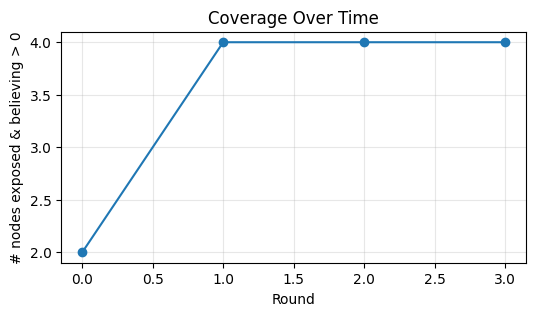

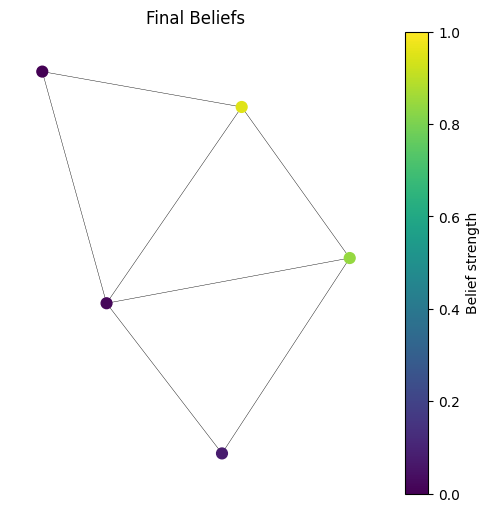

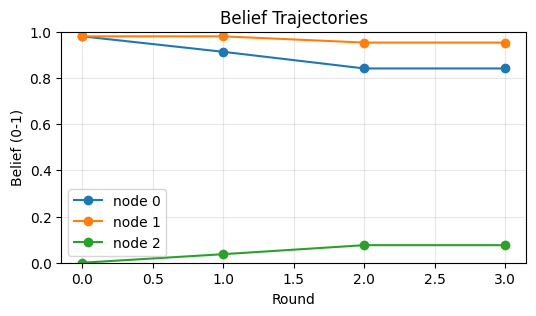

,round,0,1,2
0,0,0.980,0.980,0.000
1,1,0.913,0.980,0.037
2,2,0.841,0.953,0.076
3,3,0.841,0.953,0.076


,round,coverage,summary
0,0,2,Most people do not believe that 5G towers caus...
1,1,4,Society is generally skeptical of the claim th...
2,2,4,Most people are skeptical that 5G towers cause...
3,3,4,Most people do not strongly support the idea t...


In [3]:
import pandas as pd

plot_coverage_over_time(res['history'])
plot_final_beliefs(res['G'], res['beliefs'])
plot_belief_trajectories(res['history'], node_ids=[0, 1, 2])

df_traj = belief_trajectories_table(res['history'], node_ids=[0, 1, 2])
display(df_traj)
rows = [{'round': h['round'], 'coverage': len(h['coverage']), 'summary': h['summary']} for h in res['history']]
display(pd.DataFrame(rows))